# COMP4030 Coursework 2 Source Code

**NOTE:** Please go to the end of the file to see the source code for the final visualisation. Majority of this notebook is for data preparation and exploratory data analysis (EDA).

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

/var/folders/c2/gcn21r4d0131yjb2dvjgy9w40000gn/T/ipykernel_7669/555797462.py:1: DeprecationWarning: 
Pyarrow will become a required dependency of pandas in the next major release of pandas (pandas 3.0),
(to allow more performant data types, such as the Arrow string type, and better interoperability with other libraries)
but was not found to be installed on your system.
If this would cause problems for you,
please provide us feedback at https://github.com/pandas-dev/pandas/issues/54466
        
  import pandas as pd


In [2]:
pd.set_option('display.max_columns', None)

In [3]:
df = pd.read_csv("Results_21Mar2022.csv")
df.head()

,mc_run_id,grouping,mean_ghgs,mean_land,mean_watscar,mean_eut,mean_ghgs_ch4,mean_ghgs_n2o,mean_bio,mean_watuse,mean_acid,sd_ghgs,sd_land,sd_watscar,sd_eut,sd_ghgs_ch4,sd_ghgs_n2o,sd_bio,sd_watuse,sd_acid,n_participants,sex,diet_group,age_group
0,1,fish_female_20-29,5.421821,8.612772,14165.86240,23.945372,1.164643,0.343663,476.270413,679.923479,23.439196,2.043121,3.811792,5411.942852,8.167013,0.632547,0.146827,283.883428,249.472563,8.231176,1329,female,fish,20-29
1,1,fish_female_30-39,5.436673,8.680248,15222.77063,24.305262,1.154118,0.326868,467.923201,709.343785,24.166260,1.925977,3.527834,5761.698432,8.467858,0.601941,0.130298,270.247108,277.927269,7.947014,2024,female,fish,30-39
2,1,fish_female_40-49,5.289333,8.467723,15818.80068,24.191105,1.108404,0.310324,438.659832,707.925368,24.597700,1.781471,3.093305,5929.502250,8.107006,0.572941,0.119872,252.415063,275.760515,8.103589,1689,female,fish,40-49
3,1,fish_female_50-59,5.169020,8.219199,16962.06009,24.748154,1.032501,0.298130,395.787622,720.825105,25.004637,1.749271,3.103613,7230.767144,9.514028,0.509689,0.104731,209.566722,310.422445,8.712428,946,female,fish,50-59
4,1,fish_female_60-69,5.380268,8.570718,18212.66232,25.559430,1.098828,0.310735,421.176867,749.392826,26.048737,1.961814,3.664188,7264.966514,9.258068,0.609398,0.113401,264.599257,315.922570,8.616601,492,female,fish,60-69


In [4]:
df.isna().sum()

mc_run_id         0
grouping          0
mean_ghgs         0
mean_land         0
mean_watscar      0
mean_eut          0
mean_ghgs_ch4     0
mean_ghgs_n2o     0
mean_bio          0
mean_watuse       0
mean_acid         0
sd_ghgs           0
sd_land           0
sd_watscar        0
sd_eut            0
sd_ghgs_ch4       0
sd_ghgs_n2o       0
sd_bio            0
sd_watuse         0
sd_acid           0
n_participants    0
sex               0
diet_group        0
age_group         0
dtype: int64

In [5]:
df.duplicated().sum()

0

In [6]:
df.describe()

,mc_run_id,mean_ghgs,mean_land,mean_watscar,mean_eut,mean_ghgs_ch4,mean_ghgs_n2o,mean_bio,mean_watuse,mean_acid,sd_ghgs,sd_land,sd_watscar,sd_eut,sd_ghgs_ch4,sd_ghgs_n2o,sd_bio,sd_watuse,sd_acid,n_participants
count,72000.000000,72000.000000,72000.000000,72000.000000,72000.000000,72000.000000,72000.000000,72000.000000,72000.000000,72000.000000,72000.000000,72000.000000,72000.000000,72000.000000,72000.000000,72000.000000,72000.000000,72000.000000,72000.000000,72000.000000
mean,500.500000,6.173568,10.610860,18324.502556,24.619412,1.137918,0.437283,274.693823,739.712660,27.552727,2.122985,4.790976,7965.808116,7.705817,0.523346,0.161327,154.572597,330.070563,8.544557,770.888889
std,288.676995,3.090398,8.774950,5761.426137,10.440526,0.773895,0.225046,158.917024,318.236794,11.631872,1.281355,5.685913,4738.740090,3.495072,0.356864,0.086156,125.348736,243.793503,2.812237,830.476694
min,1.000000,1.878054,3.085156,5581.200606,7.403603,0.065370,0.123047,54.748545,192.729916,7.466161,0.510023,1.013332,1961.905132,2.032834,0.037529,0.038554,21.774227,62.224116,2.463158,19.000000
25%,250.750000,4.272191,5.833910,14473.366153,17.490146,0.664186,0.279034,163.291618,541.813501,21.159961,1.407416,1.975443,5497.338713,5.931354,0.311368,0.104523,72.598210,199.477119,7.414466,210.000000
50%,500.500000,5.460742,7.634004,17340.934265,22.741543,0.978820,0.371027,232.676491,692.166596,25.561232,1.748698,2.743017,6631.506037,7.003451,0.397751,0.139102,107.162915,258.216127,8.226186,440.000000
75%,750.250000,7.498673,11.766317,20962.489797,30.143916,1.492675,0.529600,345.247131,859.515193,33.688857,2.385814,4.789304,8476.013456,8.524474,0.680099,0.190786,190.312943,363.373866,9.223864,982.500000
max,1000.000000,20.543958,74.490099,57642.741520,85.043624,5.376923,1.508414,1426.913345,3333.230647,76.266195,11.322617,57.001158,65377.989110,46.722319,3.197389,0.660292,852.387856,2897.540323,29.240519,3752.000000


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 72000 entries, 0 to 71999
Data columns (total 24 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   mc_run_id       72000 non-null  int64  
 1   grouping        72000 non-null  object 
 2   mean_ghgs       72000 non-null  float64
 3   mean_land       72000 non-null  float64
 4   mean_watscar    72000 non-null  float64
 5   mean_eut        72000 non-null  float64
 6   mean_ghgs_ch4   72000 non-null  float64
 7   mean_ghgs_n2o   72000 non-null  float64
 8   mean_bio        72000 non-null  float64
 9   mean_watuse     72000 non-null  float64
 10  mean_acid       72000 non-null  float64
 11  sd_ghgs         72000 non-null  float64
 12  sd_land         72000 non-null  float64
 13  sd_watscar      72000 non-null  float64
 14  sd_eut          72000 non-null  float64
 15  sd_ghgs_ch4     72000 non-null  float64
 16  sd_ghgs_n2o     72000 non-null  float64
 17  sd_bio          72000 non-null 

#### Combine mc_run_id by averaging for each value
It is a good idea to combine the results from the multiple Monte Carlo simulations into an average before proceeding with analysis.
This is because:
- Each MC simulation represents a possible scenario based on the underlying probability distributions. By averaging the results across multiple simulations, you can reduce the variability introduced by individual simulations and obtain a more stable and representative estimate of the environmental impact.
- Improves accuracy
- Easier interpretation
- Simplified visualisatons

In [8]:
# Grouping the data by sex, diet group, and age group
grouped_data = df.groupby(['sex', 'diet_group', 'age_group'])

# Selecting only numeric columns and calculating the mean
numeric_columns = df.select_dtypes(include=[np.number]).columns.tolist()
grouped_data = grouped_data[numeric_columns].mean()

# Resetting index to make 'sex', 'diet_group', and 'age_group' regular columns
grouped_data = grouped_data.reset_index()

grouped_data.head()


,sex,diet_group,age_group,mc_run_id,mean_ghgs,mean_land,mean_watscar,mean_eut,mean_ghgs_ch4,mean_ghgs_n2o,mean_bio,mean_watuse,mean_acid,sd_ghgs,sd_land,sd_watscar,sd_eut,sd_ghgs_ch4,sd_ghgs_n2o,sd_bio,sd_watuse,sd_acid,n_participants
0,female,fish,20-29,500.5,4.902947,6.489031,17131.963352,20.985464,0.842864,0.322486,248.135212,759.237211,22.770956,1.819124,2.895212,7315.274034,7.189752,0.457345,0.134187,152.081144,353.395121,8.314474,1329.0
1,female,fish,30-39,500.5,4.942664,6.515886,17652.628540,20.948442,0.836500,0.321971,249.827684,759.629613,23.257771,1.727493,2.723231,7515.542350,6.925886,0.434478,0.126576,147.730751,350.984434,7.925312,2024.0
2,female,fish,40-49,500.5,4.927040,6.540682,17729.964756,20.713798,0.841106,0.320413,252.846922,748.488755,23.470170,1.732307,2.518288,7642.383968,6.733437,0.455165,0.128772,156.433538,350.627288,8.131584,1689.0
3,female,fish,50-59,500.5,4.944320,6.566172,18446.193259,20.989284,0.834881,0.323892,246.789912,788.932276,23.652474,1.851260,2.780671,8322.719017,7.751550,0.468678,0.129589,152.830237,420.222385,8.578845,946.0
4,female,fish,60-69,500.5,5.103823,6.866635,18922.366831,21.569322,0.879670,0.336023,258.645759,819.856604,24.455240,1.886936,2.941794,8307.791478,7.400676,0.486861,0.134746,163.020137,413.198002,8.663941,492.0


In [9]:
grouped_data.shape

(72, 23)

In [10]:
# Drop mc_run_id column
grouped_data = grouped_data.drop(columns=['mc_run_id'])

In [11]:
grouped_data.head(25)

,sex,diet_group,age_group,mean_ghgs,mean_land,mean_watscar,mean_eut,mean_ghgs_ch4,mean_ghgs_n2o,mean_bio,mean_watuse,mean_acid,sd_ghgs,sd_land,sd_watscar,sd_eut,sd_ghgs_ch4,sd_ghgs_n2o,sd_bio,sd_watuse,sd_acid,n_participants
0,female,fish,20-29,4.902947,6.489031,17131.963352,20.985464,0.842864,0.322486,248.135212,759.237211,22.770956,1.819124,2.895212,7315.274034,7.189752,0.457345,0.134187,152.081144,353.395121,8.314474,1329.0
1,female,fish,30-39,4.942664,6.515886,17652.628540,20.948442,0.836500,0.321971,249.827684,759.629613,23.257771,1.727493,2.723231,7515.542350,6.925886,0.434478,0.126576,147.730751,350.984434,7.925312,2024.0
2,female,fish,40-49,4.927040,6.540682,17729.964756,20.713798,0.841106,0.320413,252.846922,748.488755,23.470170,1.732307,2.518288,7642.383968,6.733437,0.455165,0.128772,156.433538,350.627288,8.131584,1689.0
3,female,fish,50-59,4.944320,6.566172,18446.193259,20.989284,0.834881,0.323892,246.789912,788.932276,23.652474,1.851260,2.780671,8322.719017,7.751550,0.468678,0.129589,152.830237,420.222385,8.578845,946.0
4,female,fish,60-69,5.103823,6.866635,18922.366831,21.569322,0.879670,0.336023,258.645759,819.856604,24.455240,1.886936,2.941794,8307.791478,7.400676,0.486861,0.134746,163.020137,413.198002,8.663941,492.0
5,female,fish,70-79,4.990763,6.874728,18969.983048,21.031889,0.856399,0.339623,259.346574,798.688351,23.791259,1.792141,2.593008,8655.525323,7.076769,0.462439,0.135321,163.449448,414.901781,8.362592,195.0
6,female,meat,20-29,6.913346,11.483909,18869.857764,29.169891,1.340652,0.497019,295.261416,853.067037,31.841356,2.060546,4.982135,7541.531276,7.943108,0.534617,0.156874,152.550699,367.778230,8.220373,669.0
7,female,meat,30-39,7.135582,11.994261,18849.367941,29.225493,1.403059,0.507655,305.726579,846.420762,32.487534,2.134566,5.421665,6982.762217,7.672538,0.543135,0.162557,154.553065,343.452887,8.104817,1350.0
8,female,meat,40-49,7.484151,13.124070,18754.898012,29.674128,1.498015,0.527166,317.036759,840.702258,33.511537,2.244597,5.955870,6919.949539,7.541887,0.570627,0.165837,160.369661,345.561908,8.215746,2710.0
9,female,meat,50-59,7.586116,13.376783,18907.620020,29.505237,1.532156,0.530448,317.633898,853.522135,33.984660,2.370397,6.518234,6832.159777,7.206146,0.599949,0.170112,161.935148,344.800984,8.238732,2682.0


In [12]:
grouped_data["diet_group"].unique()

array(['fish', 'meat', 'meat100', 'meat50', 'vegan', 'veggie'],
      dtype=object)

In [13]:
grouped_data.to_csv("grouped_data.csv", index=False)

#### Check for outliers

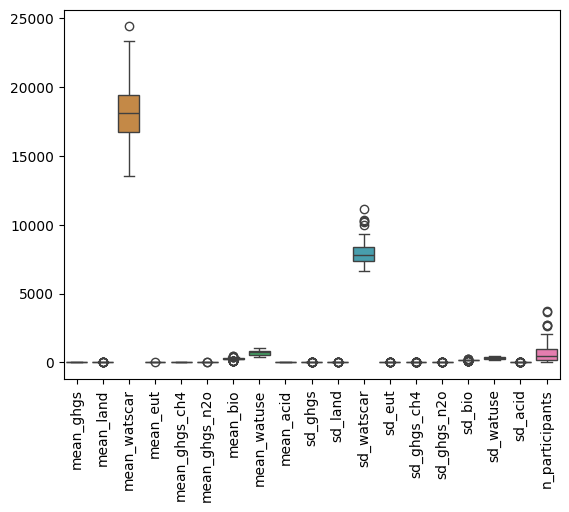

In [14]:
# Check for outliers
sns.boxplot(data=grouped_data)
plt.xticks(rotation=90)
plt.show()

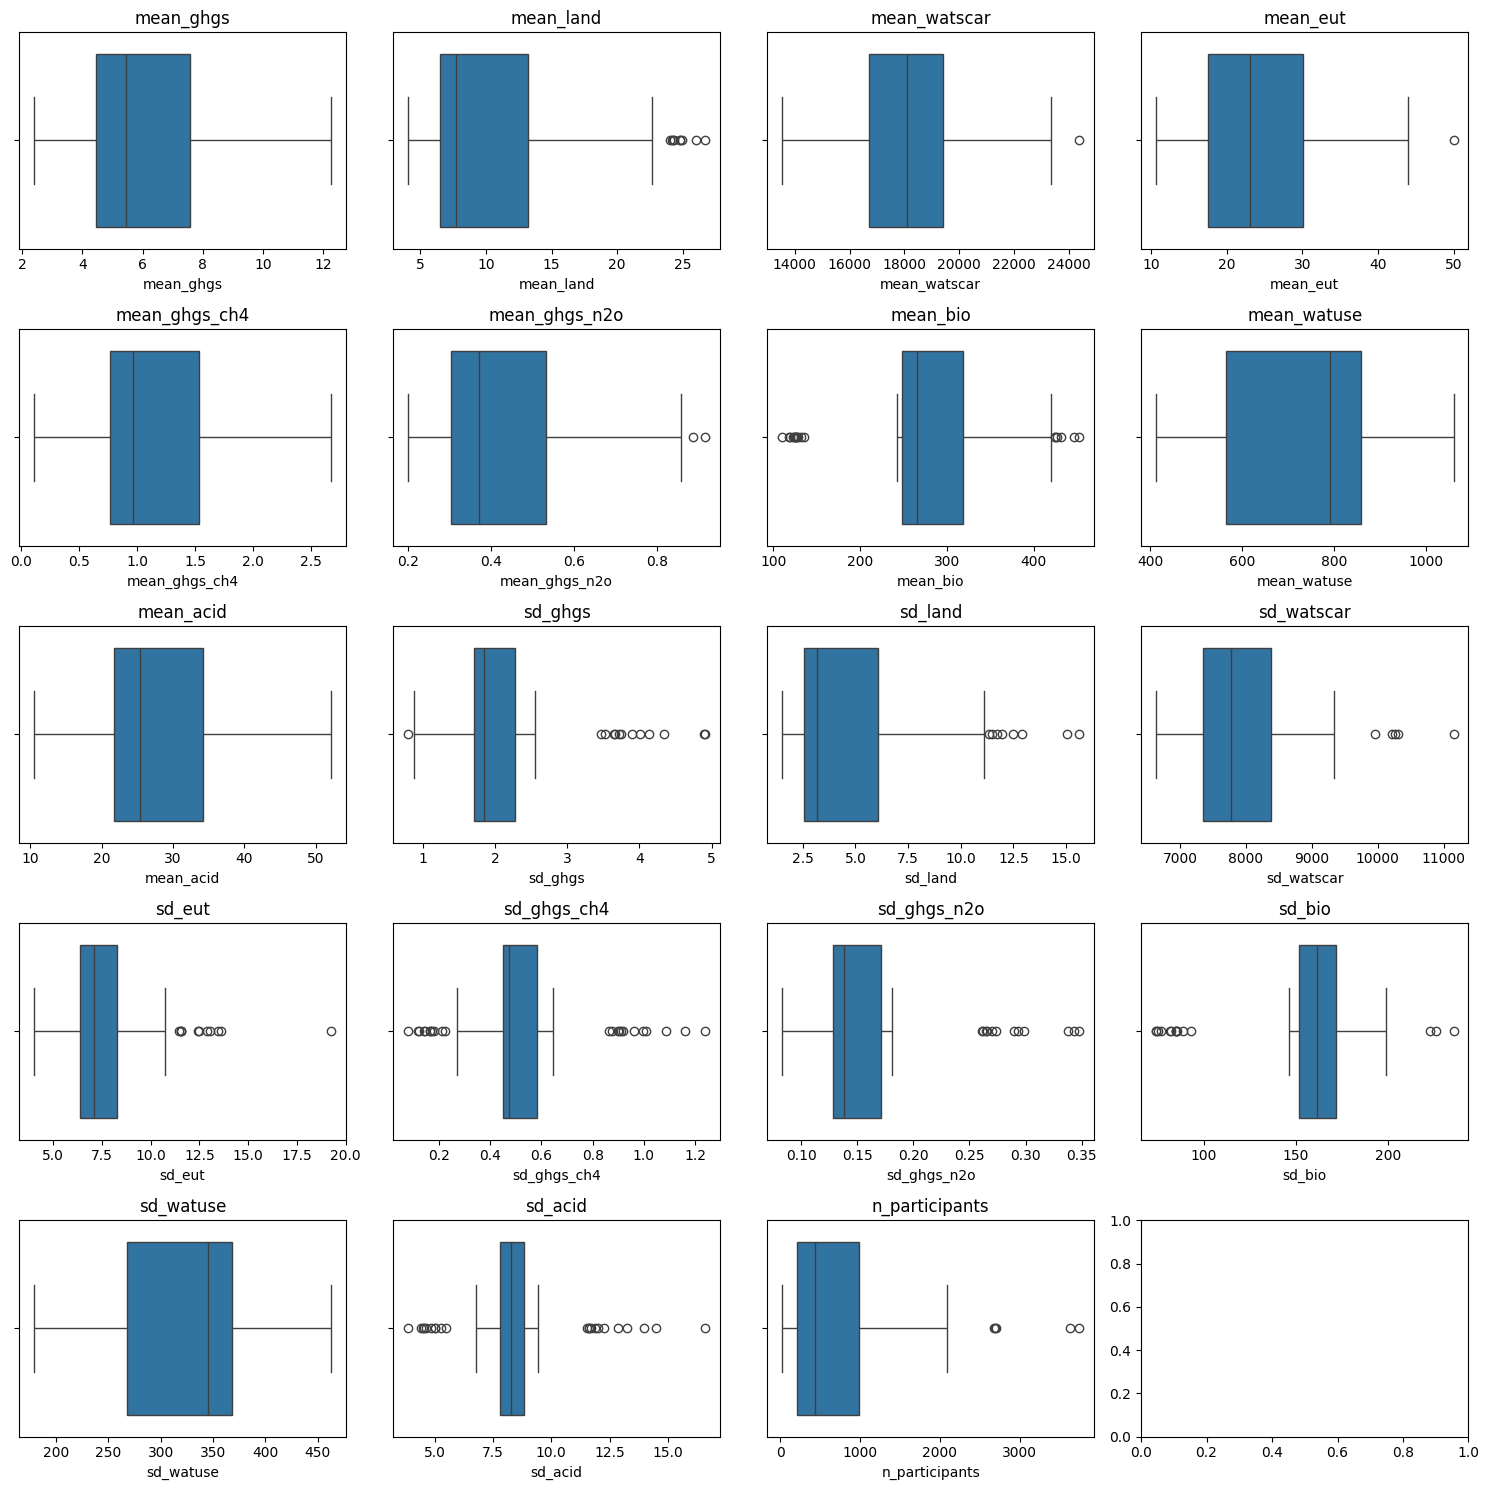

In [15]:
fig, axes = plt.subplots(nrows=5, ncols=4, figsize=(15, 15))

columns = ['mean_ghgs', 'mean_land', 'mean_watscar', 'mean_eut', 'mean_ghgs_ch4', 'mean_ghgs_n2o', 'mean_bio', 'mean_watuse', 'mean_acid', 'sd_ghgs', 'sd_land', 'sd_watscar', 'sd_eut', 'sd_ghgs_ch4', 'sd_ghgs_n2o', 'sd_bio', 'sd_watuse', 'sd_acid', 'n_participants']

for i, column in enumerate(columns):
    ax = axes[i // 4, i % 4]
    sns.boxplot(data=grouped_data, x=column, ax=ax)
    ax.set_title(column)

plt.tight_layout()
plt.show()


#### Outliers to investigate:
- sd_eut (greater than 17.5)
- 

In [16]:
grouped_data[grouped_data["mean_bio"] < 200]

,sex,diet_group,age_group,mean_ghgs,mean_land,mean_watscar,mean_eut,mean_ghgs_ch4,mean_ghgs_n2o,mean_bio,mean_watuse,mean_acid,sd_ghgs,sd_land,sd_watscar,sd_eut,sd_ghgs_ch4,sd_ghgs_n2o,sd_bio,sd_watuse,sd_acid,n_participants
24,female,vegan,20-29,2.383216,4.049673,13526.411131,10.647845,0.138213,0.198466,109.763872,411.915658,10.489061,0.912671,1.504851,7973.396780,4.294962,0.140831,0.086640,74.016501,237.768583,4.523154,487.0
25,female,vegan,30-39,2.540393,4.262573,13977.927844,11.121256,0.151392,0.212639,123.441892,425.503600,11.007468,0.970315,1.561350,7526.258562,4.514301,0.165332,0.096904,85.027599,224.270667,4.489833,376.0
26,female,vegan,40-49,2.657602,4.525626,15304.059746,11.714303,0.172362,0.222044,127.590251,451.688275,11.872144,1.093927,1.857306,10309.818237,5.070536,0.182883,0.098338,88.606772,281.641990,5.486457,219.0
27,female,vegan,50-59,2.520497,4.427549,15130.223558,10.830692,0.142114,0.218735,125.142393,424.692831,11.467557,0.973432,1.750924,8964.483613,4.070273,0.163906,0.094401,85.021981,222.032970,5.014068,106.0
28,female,vegan,60-69,2.633645,4.742450,15675.198731,11.333484,0.145497,0.223279,128.762133,439.410938,11.907675,1.069709,2.044453,9024.575135,4.730769,0.174003,0.097034,84.739435,241.533981,5.269493,81.0
29,female,vegan,70-79,2.839876,4.757808,16572.485298,12.405907,0.195634,0.229870,135.010845,505.930733,12.369181,1.458062,2.290874,10218.714541,7.089720,0.222559,0.114813,92.855307,342.575477,6.783755,25.0
60,male,vegan,20-29,2.843228,4.845974,15880.592028,12.836418,0.161168,0.230182,124.675164,492.222279,12.428287,1.249439,2.395786,8554.091776,8.299050,0.269715,0.132010,82.165339,250.971577,6.845940,198.0
61,male,vegan,30-39,2.698172,4.490259,15193.403259,11.620286,0.145903,0.217411,126.109666,452.753288,11.770708,0.970359,1.636982,8848.272732,4.437617,0.123223,0.100249,81.462933,244.113400,4.635491,251.0
62,male,vegan,40-49,2.694366,4.553664,14841.207696,11.630236,0.147843,0.224856,132.012334,441.906189,11.678908,1.024972,1.661599,8396.132230,4.744689,0.144338,0.107046,85.660019,235.180240,4.837686,165.0
63,male,vegan,50-59,2.524737,4.413799,14370.528918,11.197674,0.142867,0.211574,122.925271,416.335442,11.196164,0.793338,1.536762,6636.036392,4.120819,0.117794,0.086198,75.325271,178.599219,3.841839,62.0


In [17]:
grouped_data[grouped_data['sd_eut'] > 17.5]

,sex,diet_group,age_group,mean_ghgs,mean_land,mean_watscar,mean_eut,mean_ghgs_ch4,mean_ghgs_n2o,mean_bio,mean_watuse,mean_acid,sd_ghgs,sd_land,sd_watscar,sd_eut,sd_ghgs_ch4,sd_ghgs_n2o,sd_bio,sd_watuse,sd_acid,n_participants
48,male,meat100,20-29,12.104782,24.338793,24385.45583,49.97652,2.584397,0.917295,452.814611,1060.965921,52.15612,4.342662,12.468973,8983.22356,19.252484,1.085188,0.347972,235.53888,417.818779,16.606171,132.0


In [18]:
grouped_data[grouped_data['sd_ghgs_n2o'] > 0.20]

,sex,diet_group,age_group,mean_ghgs,mean_land,mean_watscar,mean_eut,mean_ghgs_ch4,mean_ghgs_n2o,mean_bio,mean_watuse,mean_acid,sd_ghgs,sd_land,sd_watscar,sd_eut,sd_ghgs_ch4,sd_ghgs_n2o,sd_bio,sd_watuse,sd_acid,n_participants
12,female,meat100,20-29,10.191269,20.378573,22092.641198,40.558974,2.111090,0.757690,387.390084,971.149334,43.737427,3.472158,10.126946,7772.000326,13.053763,0.876416,0.265106,190.376539,366.833674,12.013844,393.0
13,female,meat100,30-39,10.421548,21.112200,22088.092347,39.665365,2.165170,0.764295,394.707227,963.719351,43.952591,3.524736,10.474940,7356.846184,11.546817,0.863253,0.261638,186.272045,355.135424,11.597747,778.0
14,female,meat100,40-49,11.242124,23.997331,21672.363233,40.578259,2.393375,0.814624,419.277138,938.614090,45.377503,3.721250,11.332184,7269.325769,11.560344,0.918627,0.270181,192.263683,354.407874,11.610041,1935.0
15,female,meat100,50-59,11.574402,24.934026,21957.748796,40.680607,2.485821,0.827111,424.997325,960.196912,46.340110,3.646353,11.102071,7302.956355,10.710613,0.900946,0.260859,194.156676,354.253658,11.509745,1753.0
16,female,meat100,60-69,11.520473,24.780219,22267.712394,40.299174,2.482433,0.825565,418.759154,967.902312,46.208576,4.137640,12.907696,7643.375148,11.563611,0.994606,0.293375,198.225206,375.065250,12.255157,843.0
17,female,meat100,70-79,11.990853,26.031131,22709.031906,41.205293,2.635514,0.858691,432.051822,980.562330,47.783484,4.911354,15.033433,8067.332514,12.900691,1.239554,0.337893,222.841708,377.200138,14.468826,274.0
48,male,meat100,20-29,12.104782,24.338793,24385.455830,49.976520,2.584397,0.917295,452.814611,1060.965921,52.156120,4.342662,12.468973,8983.223560,19.252484,1.085188,0.347972,235.538880,417.818779,16.606171,132.0
49,male,meat100,30-39,11.178862,22.645744,23344.169109,44.005912,2.327436,0.836298,417.294565,1020.447922,46.534866,4.012635,11.937809,8613.427521,13.597158,1.006421,0.298942,198.209871,426.222736,13.252894,260.0
50,male,meat100,40-49,11.493864,24.185439,21888.216900,43.077655,2.441364,0.840707,426.420537,932.619265,46.705031,3.657695,10.870728,7213.188425,12.454753,0.898101,0.265378,192.911174,321.884405,11.715814,616.0
51,male,meat100,50-59,11.678040,24.765494,22196.915969,42.540711,2.493825,0.845726,424.304588,948.052353,47.281691,3.893788,11.705877,7541.216545,13.449846,0.961691,0.289778,198.595752,344.964345,12.849035,591.0


### EDA

In [19]:
sns.set_theme(style="whitegrid")

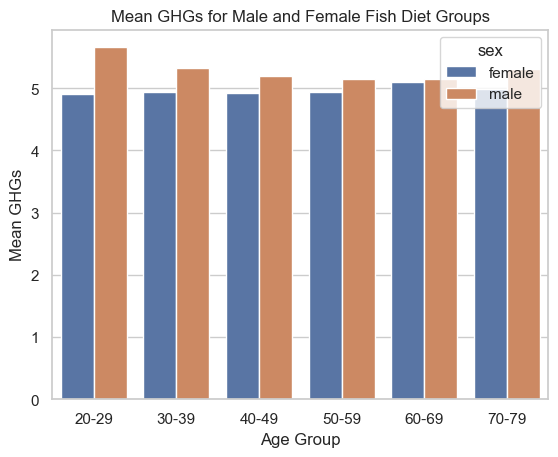

In [20]:
sns.barplot(data=grouped_data[grouped_data['diet_group'] == 'fish'], x='age_group', y='mean_ghgs', hue='sex')
plt.title('Mean GHGs for Male and Female Fish Diet Groups')
plt.xlabel('Age Group')
plt.ylabel('Mean GHGs')
plt.show()

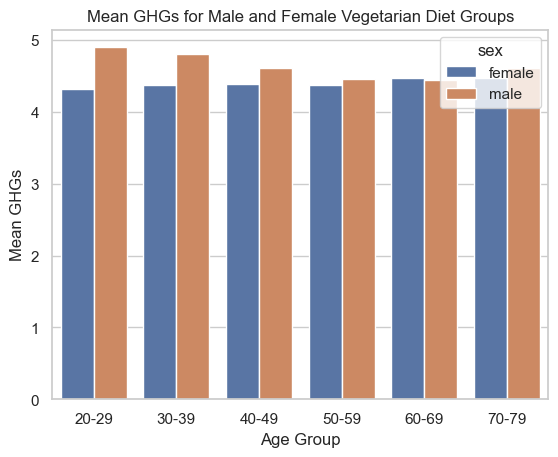

In [21]:
sns.barplot(data=grouped_data[grouped_data['diet_group'] == 'veggie'], x='age_group', y='mean_ghgs', hue='sex')
plt.title('Mean GHGs for Male and Female Vegetarian Diet Groups')
plt.xlabel('Age Group')
plt.ylabel('Mean GHGs')
plt.show()

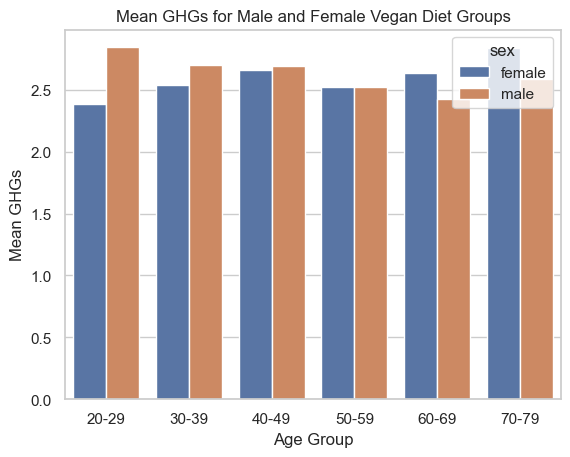

In [22]:
sns.barplot(data=grouped_data[grouped_data['diet_group'] == 'vegan'], x='age_group', y='mean_ghgs', hue='sex')
plt.title('Mean GHGs for Male and Female Vegan Diet Groups')
plt.xlabel('Age Group')
plt.ylabel('Mean GHGs')
plt.show()

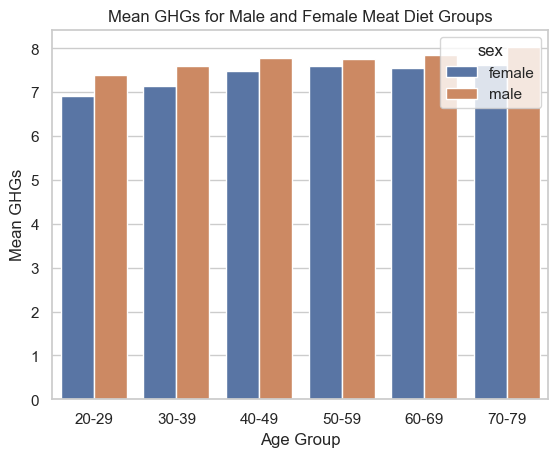

In [23]:
sns.barplot(data=grouped_data[grouped_data['diet_group'] == 'meat'], x='age_group', y='mean_ghgs', hue='sex')
plt.title('Mean GHGs for Male and Female Meat Diet Groups')
plt.xlabel('Age Group')
plt.ylabel('Mean GHGs')
plt.show()

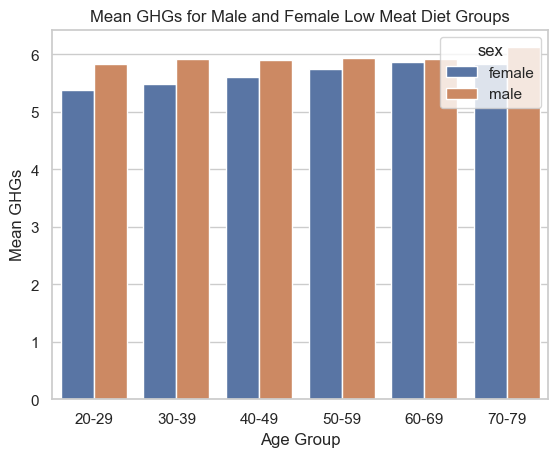

In [24]:
sns.barplot(data=grouped_data[grouped_data['diet_group'] == 'meat50'], x='age_group', y='mean_ghgs', hue='sex')
plt.title('Mean GHGs for Male and Female Low Meat Diet Groups')
plt.xlabel('Age Group')
plt.ylabel('Mean GHGs')
plt.show()

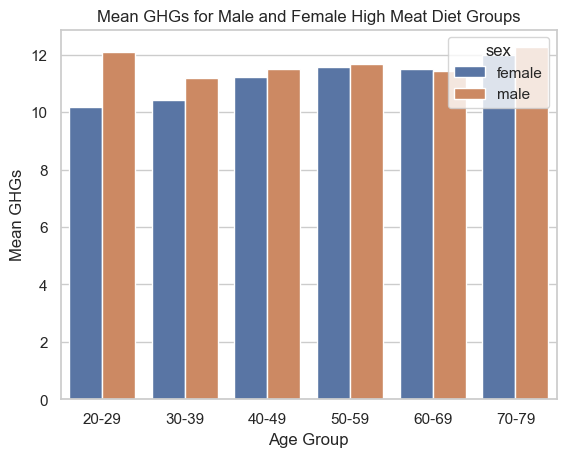

In [25]:
sns.barplot(data=grouped_data[grouped_data['diet_group'] == 'meat100'], x='age_group', y='mean_ghgs', hue='sex')
plt.title('Mean GHGs for Male and Female High Meat Diet Groups')
plt.xlabel('Age Group')
plt.ylabel('Mean GHGs')
plt.show()

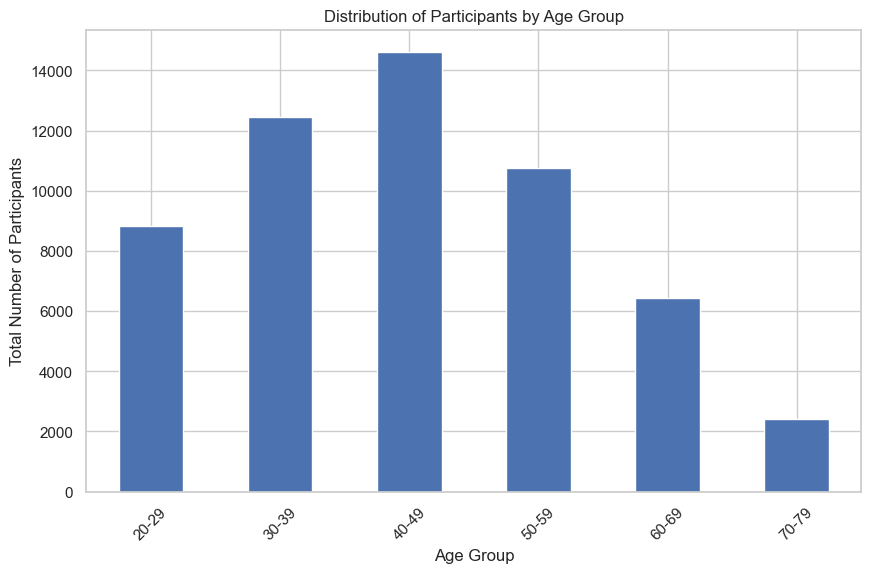

In [26]:
age_group_distribution = grouped_data.groupby('age_group')['n_participants'].sum()

# Plotting the distribution
plt.figure(figsize=(10, 6))
age_group_distribution.plot(kind='bar')
plt.title('Distribution of Participants by Age Group')
plt.xlabel('Age Group')
plt.ylabel('Total Number of Participants')
plt.xticks(rotation=45)
plt.show()

<Figure size 1200x800 with 0 Axes>

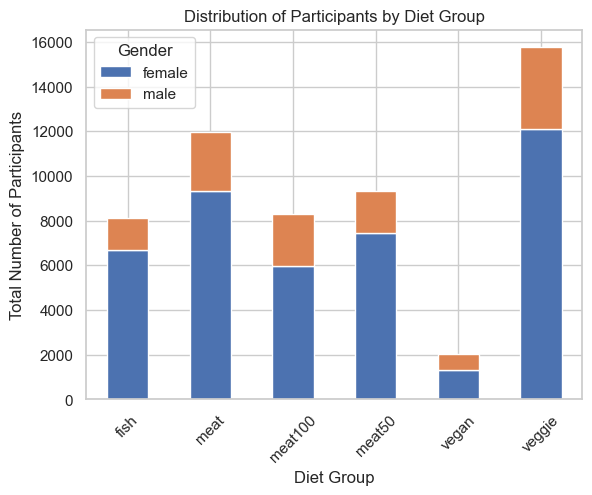

In [27]:
# Grouping data by diet group and sex, then summing the number of participants
diet_sex_distribution = grouped_data.groupby(['diet_group', 'sex'])['n_participants'].sum().unstack()

# Plotting the distribution
plt.figure(figsize=(12, 8))
diet_sex_distribution.plot(kind='bar', stacked=True)
plt.title('Distribution of Participants by Diet Group')
plt.xlabel('Diet Group')
plt.ylabel('Total Number of Participants')
plt.xticks(rotation=45)
plt.ticklabel_format(style='plain', axis='y')
plt.legend(title='Gender')
plt.show()

<Figure size 1500x1000 with 0 Axes>

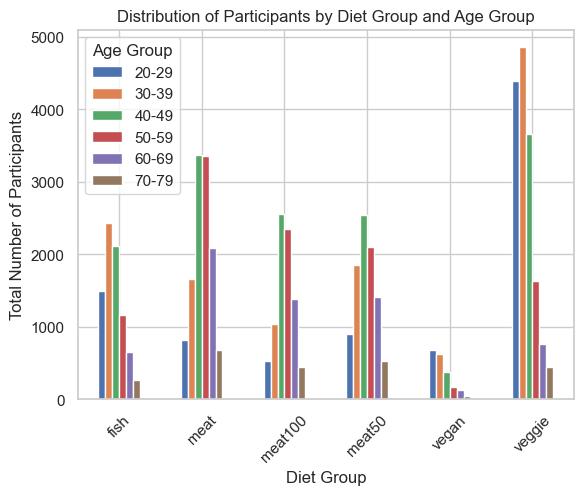

In [28]:
# Grouping data by diet group and age group, then summing the number of participants
age_diet_distribution = grouped_data.groupby(['diet_group', 'age_group'])['n_participants'].sum().unstack()

# Plotting the distribution
plt.figure(figsize=(15, 10))
age_diet_distribution.plot(kind='bar')
plt.title('Distribution of Participants by Diet Group and Age Group')
plt.xlabel('Diet Group')
plt.ylabel('Total Number of Participants')
plt.xticks(rotation=45)
plt.legend(title='Age Group')
plt.show()


- The least frequent age group is 70-79 across all diet groups.
- Meat eaters are predominantly between 40-59 years old.
- Vegetarians are mostly the younger age groups, mostly 20-39 years old.
- Despite the small participant size for vegans, the majority are also 20-39.


- It is not surprising that the majority of participants are vegetarian now that we can see majority of participants are also 30-49, and the vegetarian group consists mostly of 20-39 year olds.

In [29]:
# Creating ratio features
grouped_data['ghgs_to_land_ratio'] = grouped_data['mean_ghgs'] / grouped_data['mean_land']
grouped_data['ghgs_to_watuse_ratio'] = grouped_data['mean_ghgs'] / grouped_data['mean_watuse']
grouped_data['ch4_to_n2o_ratio'] = grouped_data['mean_ghgs_ch4'] / grouped_data['mean_ghgs_n2o']


grouped_data[['ghgs_to_land_ratio', 'ghgs_to_watuse_ratio', 'ch4_to_n2o_ratio']].head()

,ghgs_to_land_ratio,ghgs_to_watuse_ratio,ch4_to_n2o_ratio
0,0.755575,0.006458,2.613643
1,0.758556,0.006507,2.598063
2,0.753292,0.006583,2.625067
3,0.752999,0.006267,2.577652
4,0.743279,0.006225,2.617885


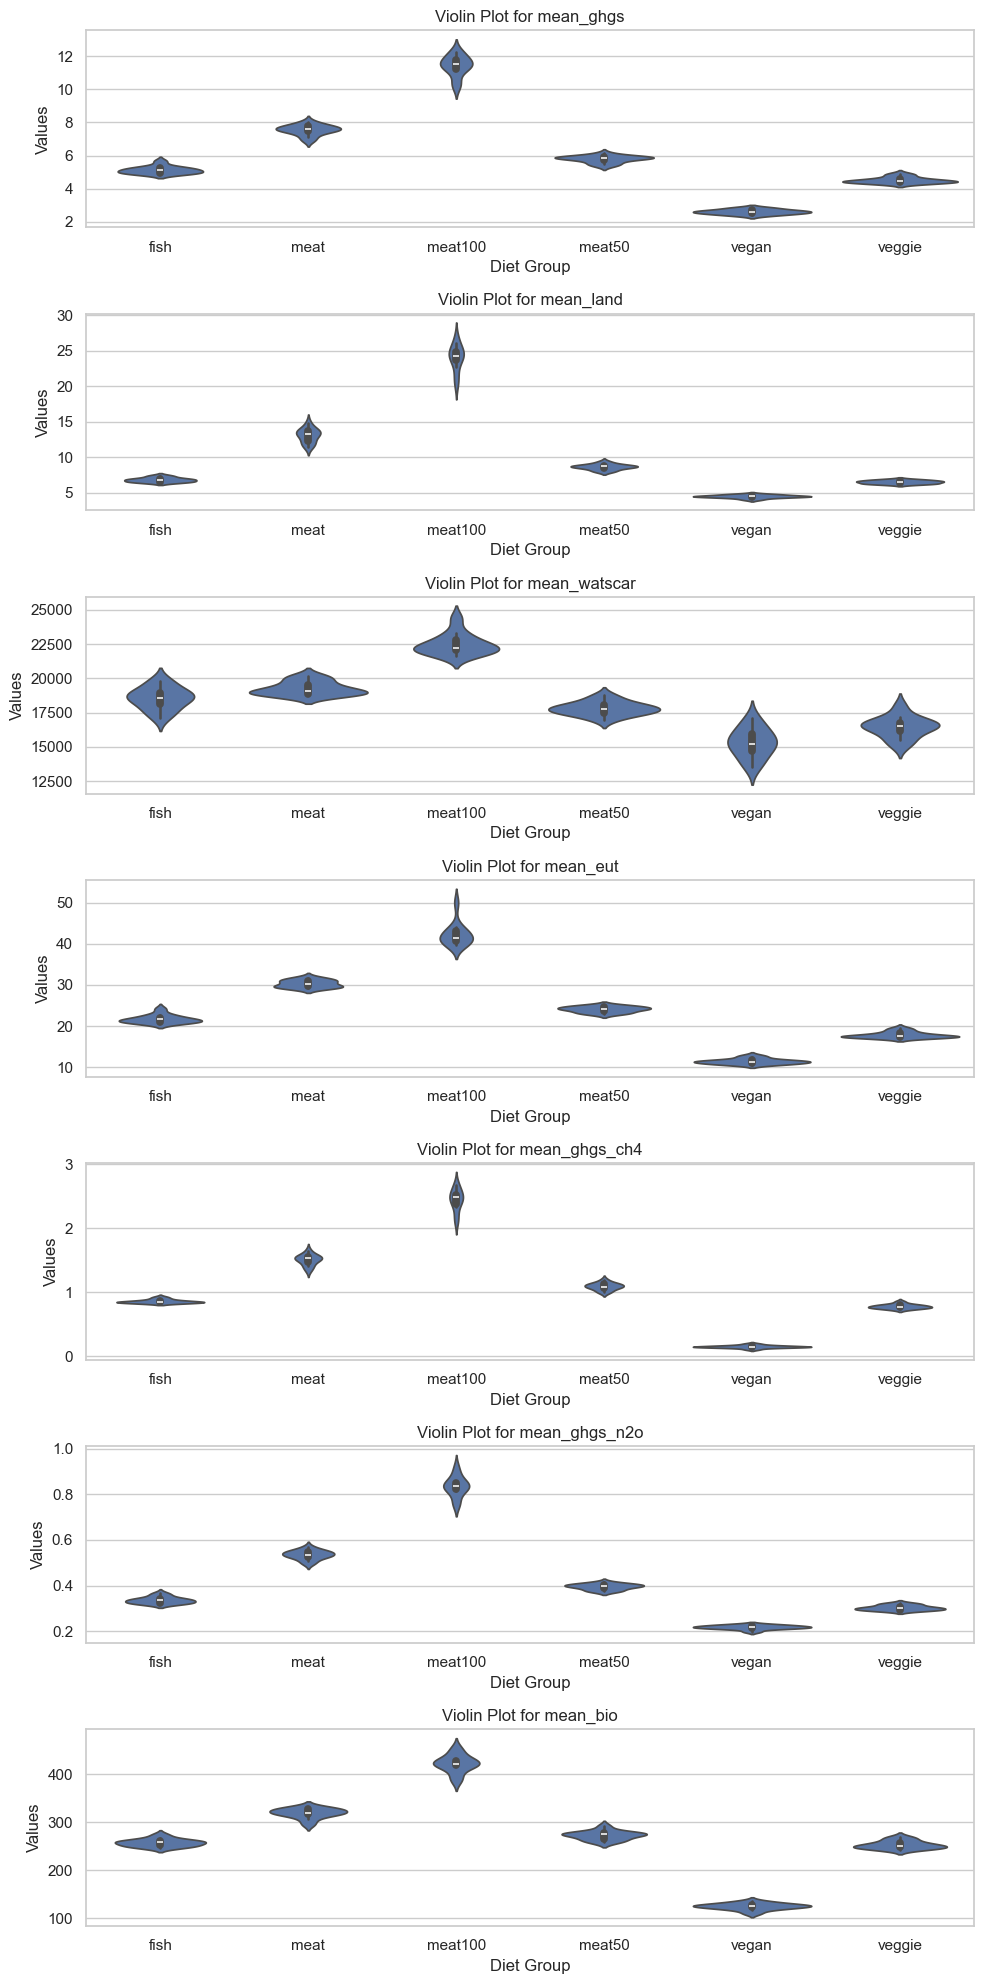

In [30]:
indicator_columns = ['mean_ghgs', 'mean_land', 'mean_watscar', 'mean_eut', 'mean_ghgs_ch4', 'mean_ghgs_n2o', 'mean_bio']

# Create a violin plot for each environmental indicator
fig, axes = plt.subplots(len(indicator_columns), 1, figsize=(10, 20))

for i, col in enumerate(indicator_columns):
    sns.violinplot(ax=axes[i], x='diet_group', y=col, data=grouped_data)
    axes[i].set_title(f'Violin Plot for {col}')
    axes[i].set_xlabel('Diet Group')
    axes[i].set_ylabel('Values')

plt.tight_layout()
plt.show()

### Sunburst charts
I will now use sunburst charts to view the data in a hierarchical format. 

In [31]:
import plotly.express as px

In [32]:
fig = px.sunburst(grouped_data, path=['sex', 'diet_group', 'age_group'], values='n_participants')
fig.update_layout(title='Number of Participants', title_x=0.5)
fig.show()

In [33]:
fig = px.sunburst(grouped_data, path=['sex', 'diet_group', 'age_group'], values='mean_ghgs')
fig.update_layout(title='Dietry Impact On Greenhouse Gas Emissions across Gender and Age', title_x=0.5)
fig.show()

In [34]:
fig = px.sunburst(grouped_data, path=['sex', 'diet_group', 'age_group'], values='ghgs_to_watuse_ratio')
fig.update_layout(title='Mean Eutrophication Potential', title_x=0.5)
fig.show()

In [35]:
fig = px.sunburst(grouped_data, path=['sex', 'diet_group', 'age_group'], values='mean_bio')
fig.update_layout(title='Mean Biodiversity Impact', title_x=0.5)
fig.show()

In [36]:
import pandas as pd
import plotly.express as px
import dash
import dash_core_components as dcc
import dash_html_components as html
from dash.dependencies import Input, Output

/var/folders/c2/gcn21r4d0131yjb2dvjgy9w40000gn/T/ipykernel_7669/4185938564.py:4: UserWarning:


The dash_core_components package is deprecated. Please replace
`import dash_core_components as dcc` with `from dash import dcc`

/var/folders/c2/gcn21r4d0131yjb2dvjgy9w40000gn/T/ipykernel_7669/4185938564.py:5: UserWarning:


The dash_html_components package is deprecated. Please replace
`import dash_html_components as html` with `from dash import html`



In [37]:
grouped_data.head()

,sex,diet_group,age_group,mean_ghgs,mean_land,mean_watscar,mean_eut,mean_ghgs_ch4,mean_ghgs_n2o,mean_bio,mean_watuse,mean_acid,sd_ghgs,sd_land,sd_watscar,sd_eut,sd_ghgs_ch4,sd_ghgs_n2o,sd_bio,sd_watuse,sd_acid,n_participants,ghgs_to_land_ratio,ghgs_to_watuse_ratio,ch4_to_n2o_ratio
0,female,fish,20-29,4.902947,6.489031,17131.963352,20.985464,0.842864,0.322486,248.135212,759.237211,22.770956,1.819124,2.895212,7315.274034,7.189752,0.457345,0.134187,152.081144,353.395121,8.314474,1329.0,0.755575,0.006458,2.613643
1,female,fish,30-39,4.942664,6.515886,17652.628540,20.948442,0.836500,0.321971,249.827684,759.629613,23.257771,1.727493,2.723231,7515.542350,6.925886,0.434478,0.126576,147.730751,350.984434,7.925312,2024.0,0.758556,0.006507,2.598063
2,female,fish,40-49,4.927040,6.540682,17729.964756,20.713798,0.841106,0.320413,252.846922,748.488755,23.470170,1.732307,2.518288,7642.383968,6.733437,0.455165,0.128772,156.433538,350.627288,8.131584,1689.0,0.753292,0.006583,2.625067
3,female,fish,50-59,4.944320,6.566172,18446.193259,20.989284,0.834881,0.323892,246.789912,788.932276,23.652474,1.851260,2.780671,8322.719017,7.751550,0.468678,0.129589,152.830237,420.222385,8.578845,946.0,0.752999,0.006267,2.577652
4,female,fish,60-69,5.103823,6.866635,18922.366831,21.569322,0.879670,0.336023,258.645759,819.856604,24.455240,1.886936,2.941794,8307.791478,7.400676,0.486861,0.134746,163.020137,413.198002,8.663941,492.0,0.743279,0.006225,2.617885


### Interactive sunburst chart
I will use Dash from Plotly to create an interactive version of the sunburst charts seen above, where the user can change the displayed variable by clicking the corresponding button. 

In [38]:
grouped_data = pd.read_csv('grouped_data.csv')
columns_to_visualize = ['n_participants', 'mean_ghgs', 'mean_land', 'mean_watscar', 'mean_eut', 'mean_watuse', 'mean_ghgs_ch4', 'mean_ghgs_n2o', 'mean_bio', 'mean_acid']

app = dash.Dash(__name__)

app.layout = html.Div([
    html.H1('Interactive Sunburst Chart', style={'text-align': 'center'}),
    html.Div([
        dcc.Graph(id='sunburst-chart')
    ]),
    html.Div([
        html.Button(col, id=col, n_clicks=0, style={'margin': '5px'})
        for col in columns_to_visualize
    ], style={'display': 'flex', 'justify-content': 'center', 'margin-top': '20px'})
])

@app.callback(
    Output('sunburst-chart', 'figure'),
    [Input(col, 'n_clicks') for col in columns_to_visualize]
)
def update_sunburst(*args):
    ctx = dash.callback_context
    if not ctx.triggered:
        selected_column = 'n_participants'
    else:
        selected_column = ctx.triggered[0]['prop_id'].split('.')[0]
    
    fig = px.sunburst(grouped_data, path=['sex', 'diet_group', 'age_group'], values=selected_column)
    fig.update_layout(title=f'{selected_column}', title_x=0.5)
    return fig

if __name__ == '__main__':
    app.run_server(debug=True)